# Load the tests to compare

In [8]:
%matplotlib inline
import os
import sys
import json
import pickle
import pandas as pd

# get an absolute path to the directory that contains parent files
project_dir = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(project_dir, '..', '..')))

from experiments.utils.constants import TESTS_RESULTS_PATH
series = 13
start_test = 0
end_test = 12
tests_ids = [i for i in range(start_test, end_test)]
tests_names = [i for i in range(start_test, end_test)]

tests = {}


for test_id, test_name in zip(tests_ids, tests_names):
    test_path = os.path.join(
        TESTS_RESULTS_PATH,
        'series',
        str(series),
        'tests',
        str(test_id))
    with open(os.path.join(test_path, 'info.json')) as cf:
        info = json.loads(cf.read())
    with open(os.path.join(test_path, 'episodes.pickle'), 'rb') as input_file:
        episodes = pickle.load(input_file)
    tests.update({test_name: {
        'info': info,
        'episodes': episodes
    }})
test_types = [test['info']['algorithm'] for _, test in tests.items()]
print("availeble tests:\n {}\ntests_types:\n {}".format(
    list(tests.keys()),
    test_types))

availeble tests:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
tests_types:
 ['DQN', 'DQN', 'DQN', 'IMPALA', 'IMPALA', 'IMPALA', 'PG', 'PG', 'PG', 'PPO', 'PPO', 'PPO']


# All Stats of a test

In [9]:
test_id = 0
episdoe_id = 0
print(f'tests entry structure:\n{tests[test_id].keys()}')
print(f"tests entry info structure:\n{tests[test_id]['info'].keys()}")
print(f"tests entry episodes info:\n{tests[test_id]['episodes'][episdoe_id].columns}")

tests entry structure:
dict_keys(['info', 'episodes'])
tests entry info structure:
dict_keys(['type_env', 'series', 'cluster_id', 'workload_id', 'checkpoint', 'experiment_str', 'experiments', 'episode_length', 'num_episodes', 'algorithm', 'penalty_consolidated', 'num_workers'])
tests entry episodes info:
Index(['action', 'raw_obs', 'num_consolidated', 'num_overloaded',
       'scheduling_timestep', 'scheduling_success', 'reward_illegal',
       'reward_u', 'reward_c', 'reward_cv', 'reward_v', 'reward_g', 'reward_p',
       'u', 'c', 'cv', 'v', 'g', 'p', 'reward'],
      dtype='object')


# Extracting necessary stats of all tests

In [10]:
final_stats = []
for test_id in range(start_test, end_test):
    # TODO check for correctness
    num_consolidated_episodes_average = [episode['num_consolidated'].mean() for episode in tests[test_id]['episodes']]
    num_consolidated_test_average = sum(num_consolidated_episodes_average) / len(num_consolidated_episodes_average)

    num_overloaded_episodes_average = [episode['num_overloaded'].mean() for episode in tests[test_id]['episodes']]
    num_overloaded_test_average = sum(num_overloaded_episodes_average) / len(num_overloaded_episodes_average)

    scheduling_success_episodes_average = [episode['scheduling_success'].mean() for episode in tests[test_id]['episodes']]
    scheduling_success_test_average = sum(scheduling_success_episodes_average) / len(scheduling_success_episodes_average)

    reward_illegal_episodes_average = [episode['reward_illegal'].mean() for episode in tests[test_id]['episodes']]
    reward_illegal_test_average = sum(reward_illegal_episodes_average) / len(reward_illegal_episodes_average)

    reward_u_episodes_average = [episode['reward_u'].mean() for episode in tests[test_id]['episodes']]
    reward_u_test_average = sum(reward_u_episodes_average) / len(reward_u_episodes_average)

    reward_c_episodes_average = [episode['reward_c'].mean() for episode in tests[test_id]['episodes']]
    reward_c_test_average = sum(reward_c_episodes_average) / len(reward_c_episodes_average)

    reward_v_episodes_average = [episode['reward_v'].mean() for episode in tests[test_id]['episodes']]
    reward_v_test_average = sum(reward_v_episodes_average) / len(reward_v_episodes_average)

    reward_g_episodes_average = [episode['reward_g'].mean() for episode in tests[test_id]['episodes']]
    reward_g_test_average = sum(reward_g_episodes_average) / len(reward_g_episodes_average)

    reward_p_episodes_average = [episode['reward_p'].mean() for episode in tests[test_id]['episodes']]
    reward_p_test_average = sum(reward_p_episodes_average) / len(reward_p_episodes_average)

    cv_episodes_average = [episode['cv'].mean() for episode in tests[test_id]['episodes']]
    cv_test_average = sum(cv_episodes_average) / len(cv_episodes_average)

    reward_episodes_average = [episode['reward'].mean() for episode in tests[test_id]['episodes']]
    reward_test_average = sum(reward_episodes_average) / len(reward_episodes_average)


    final_stats.append({
        'test_id': test_id,
        'checkpoint': tests[test_id]['info']['checkpoint'],
        # TODO where is workload id
        'workload_id': tests[test_id]['info']['workload_id'],
        'experiments': tests[test_id]['info']['experiments'],
        'episode_length': tests[test_id]['info']['episode_length'],
        'num_episodes': tests[test_id]['info']['num_episodes'],
        'penalalty_consolidated': tests[test_id]['info']['penalty_consolidated'],
        'consolidated': num_consolidated_test_average,
        'variance': cv_test_average
    })

final_stats_df = pd.DataFrame(final_stats)
final_stats_df['test_types'] = test_types
# final_stats_df.loc[df['penalalty_consolidated']]

# TODO add the following information to the table (from the info.json file)
# - penatly_latency
# - penalty_conslidation

In [4]:
test_id = 0
tests[test_id]['info']

{'type_env': 'sim-scheduler',
 'series': 76,
 'cluster_id': 13,
 'workload_id': 0,
 'checkpoint': 200,
 'experiment_str': 'DQN_SimSchedulerEnv_2c3b3_00000_0_2023-01-28_22-43-24',
 'experiments': 0,
 'episode_length': 1000,
 'num_episodes': 5,
 'algorithm': 'DQN',
 'penalty_consolidated': 1,
 'num_workers': 4}

# compare tests - tables

In [5]:
final_stats_df = final_stats_df.sort_values(by=['test_types', 'consolidated']).reset_index(drop=True)
final_stats_df

,test_id,checkpoint,workload_id,experiments,episode_length,num_episodes,penalalty_consolidated,consolidated,variance,test_types
0,1,200,0,1,1000,5,0,0.206451,0.001838,DQN
1,2,200,0,2,1000,5,1,2.449508,0.005825,DQN
2,0,200,0,0,1000,5,1,2.632111,0.005845,DQN
3,4,132,0,1,1000,5,0,0.209439,0.002145,IMPALA
4,5,130,0,2,1000,5,1,0.312756,0.002012,IMPALA
5,3,126,0,0,1000,5,1,3.002299,0.005942,IMPALA
6,6,1124,0,0,1000,5,1,3.002299,0.005942,PG
7,7,1123,0,1,1000,5,0,3.002299,0.005942,PG
8,8,1124,0,2,1000,5,1,3.002299,0.005942,PG
9,10,1702,0,1,1000,5,0,0.285556,0.000997,PPO


# compare tests - plots

                 IMPALA       PPO       DQN
mode                                       
Consolidation  0.005942  0.005942  0.005845
Variance       0.002145  0.000997  0.001838
Balance        0.002012  0.004445  0.005825


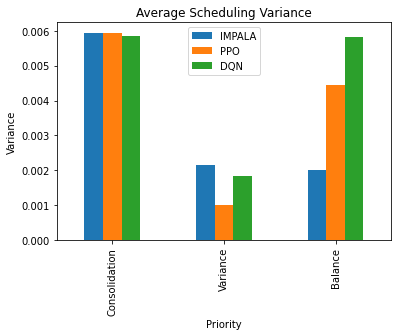

In [31]:
num_algorithms  = 3
# algorithms = ['IMPALA', 'PG', 'PPO', 'DQN']
algorithms = ['IMPALA', 'PPO', 'DQN']
modes = ['Consolidation', 'Variance', 'Balance']
# df_to_plot = pd.DataFrame([], columns=['mode', 'IMPALA', 'PG', 'PPO', 'DQN'])
df_to_plot = pd.DataFrame([], columns=['mode', 'IMPALA', 'PPO', 'DQN'])
for modulo, mode in zip(range(num_algorithms), modes):
    mode_val = final_stats_df[
        (final_stats_df.index % num_algorithms == modulo)][['variance', 'test_types']]
    data = {'mode': [mode]}
    for alg in algorithms:
        value = mode_val[mode_val['test_types'] == alg]['variance'].tolist()[0]
        data.update({alg: [value]})
    selected = pd.DataFrame(data)
    df_to_plot = df_to_plot.append(selected)
df_to_plot.set_index('mode', inplace=True)
print(df_to_plot)

import matplotlib.pyplot as plt
df_to_plot.plot(kind='bar')
plt.title("Average Scheduling Variance")
plt.xlabel("Priority")
plt.ylabel("Variance")
# plt.xticks(rotation=90)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('test-v.pdf')

                 IMPALA       PPO       DQN
mode                                       
Consolidation  3.002299  3.002299  2.632111
Variance       0.209439  0.285556  0.206451
Balance        0.312756  1.196594  2.449508


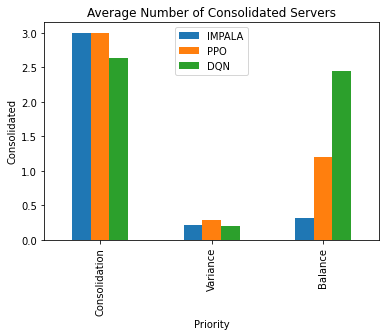

In [32]:
num_algorithms  = 3
# algorithms = ['IMPALA', 'PG', 'PPO', 'DQN']
algorithms = ['IMPALA', 'PPO', 'DQN']
# modes = ['Consolidation', 'Variance', 'Balance']
# df_to_plot = pd.DataFrame([], columns=['mode', 'IMPALA', 'PG', 'PPO', 'DQN'])
df_to_plot = pd.DataFrame([], columns=['mode', 'IMPALA', 'PPO', 'DQN'])
for modulo, mode in zip(range(num_algorithms), modes):
    mode_val = final_stats_df[
        (final_stats_df.index % num_algorithms == modulo)][['consolidated', 'test_types']]
    data = {'mode': [mode]}
    for alg in algorithms:
        value = mode_val[mode_val['test_types'] == alg]['consolidated'].tolist()[0]
        data.update({alg: [value]})
    selected = pd.DataFrame(data)
    df_to_plot = df_to_plot.append(selected)
df_to_plot.set_index('mode', inplace=True)
print(df_to_plot)

import matplotlib.pyplot as plt
df_to_plot.plot(kind='bar')
plt.title("Average Number of Consolidated Servers")
plt.xlabel("Priority")
plt.ylabel("Consolidated")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('test-p.pdf')

,0,1,2
variance,0.001198,0.001086,0.001127
test_types,IMPALA,PG,PPO
